In [ ]:
#library imports
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split

## Getting IRIS Dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data > /dev/null
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names > /dev/null

--2023-03-12 20:03:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2023-03-12 20:03:30 (85.5 MB/s) - ‘iris.data’ saved [4551/4551]

--2023-03-12 20:03:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [application/x-httpd-php]
Saving to: ‘iris.names’

iris.names          100%[===================>]   2.93K  --.-KB/s    in 0s      

2023-03-12 20:03:30 (

## Reading IRIS Dataset using Pandas

In [ ]:
df = pd.read_csv('iris.data', sep=',',names=['sepal_length','sepal_width','petal_length','petal_width', 'label'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

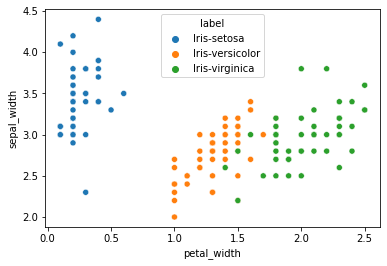

In [ ]:
sns.scatterplot(data=df,y='sepal_width', x='petal_width',hue='label',cmap='gray')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

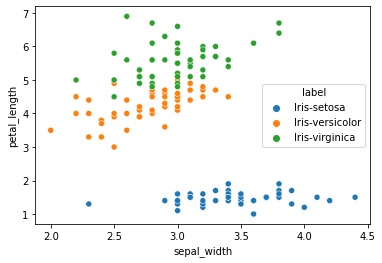

In [ ]:
sns.scatterplot(data=df,x='sepal_width', y='petal_length',hue='label',cmap='gray')

#### We can select sepal width and petal length as our features and classes as iris-setosa and iris-versicolor

## Converting data to Tensors for training

In [ ]:
classes=['Iris-setosa','Iris-versicolor']
tmp=df[df['label'].isin(classes)]
tmp['label'].apply(lambda x:int(x=='Iris-setosa'))

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: label, Length: 100, dtype: int64

## Generating torch tensors from dataframe

In [ ]:
def get_data(df,features=['sepal_width','petal_length'], label='label', classes=['Iris-setosa','Iris-versicolor']):
  data = df[df['label'].isin(classes)]
  data['out']=df['label'].apply(lambda x:int(x=='Iris-setosa'))
  X = torch.from_numpy(data[features].astype(float).to_numpy())
  Y = torch.from_numpy(data['out'].astype(float).to_numpy()).unsqueeze(1)
  return X,Y

In [ ]:
def plot_data(df,features=['sepal_width','petal_length'], label='label', classes=['Iris-setosa','Iris-versicolor']):
  data = df[df['label'].isin(classes)]
  sns.scatterplot(data=data,x=features[0], y=features[1],hue='label',cmap='gray')


In [ ]:
def get_data_split(df,features=['sepal_width','petal_length'], label='label', classes=['Iris-setosa','Iris-versicolor']):
  data = df[df['label'].isin(classes)]
  data['out']=df['label'].apply(lambda x:int(x=='Iris-setosa'))
  print(data.head())
  data_train,data_test = train_test_split(data,test_size=0.2,stratify=data[label])
  X_train = torch.from_numpy(data_train[features].astype(float).to_numpy())
  Y_train = torch.from_numpy(data_train['out'].astype(float).to_numpy()).unsqueeze(1)
  X_test = torch.from_numpy(data_test[features].astype(float).to_numpy())
  Y_test = torch.from_numpy(data_test['out'].astype(float).to_numpy()).unsqueeze(1)
  return X_train,Y_train, X_test, Y_test

In [ ]:
X, Y = get_data(df)

<ipython-input-8-9c943960df37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['out']=df['label'].apply(lambda x:int(x=='Iris-setosa'))


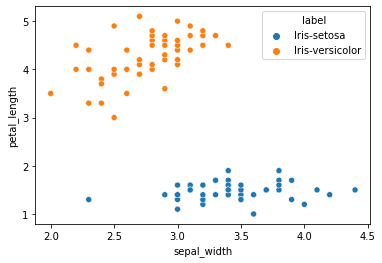

In [ ]:
plot_data(df)

In [ ]:
X_train, Y_train, X_test, Y_test = get_data_split(df)

   sepal_length  sepal_width  petal_length  petal_width        label  out
0           5.1          3.5           1.4          0.2  Iris-setosa    1
1           4.9          3.0           1.4          0.2  Iris-setosa    1
2           4.7          3.2           1.3          0.2  Iris-setosa    1
3           4.6          3.1           1.5          0.2  Iris-setosa    1
4           5.0          3.6           1.4          0.2  Iris-setosa    1


<ipython-input-10-6fc96c7aebbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['out']=df['label'].apply(lambda x:int(x=='Iris-setosa'))


In [ ]:
label_names = {1:'Iris-setosa',0:'Iris-versicolor'}

In [ ]:
# Adding 1 to X_train for bias
ones = torch.ones((X_train.shape[0],1),dtype=torch.float64)
X_train = torch.cat((X_train,ones),-1)

# Adding 1 to X_test for bias
ones = torch.ones((X_test.shape[0],1),dtype=torch.float64)
X_test = torch.cat((X_test,ones),-1)

In [ ]:
print("Shape of the features and output")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Shape of the features and output
torch.Size([80, 3]) torch.Size([80, 1]) torch.Size([20, 3]) torch.Size([20, 1])


# Split Ratio and Equal Class distribution

In [ ]:
print("Count of the training data")
print(X_train.shape[0])
print("Count of each label in Training Data")
_1 = Y_train.sum()
_2 = Y_train.shape[0] - _1
print('Iris-setosa: '+str(_1.item()),' Iris-versicolor: '+str(_2.item()))
print()
print("Count of the testing data")
print(X_test.shape[0])
print("Count of each label in Testing Data")
_1 = Y_test.sum()
_2 = Y_test.shape[0] - _1
print('Iris-setosa: '+str(_1.item()),' Iris-versicolor: '+str(_2.item()))

Count of the training data
80
Count of each label in Training Data
Iris-setosa: 40.0  Iris-versicolor: 40.0

Count of the testing data
20
Count of each label in Testing Data
Iris-setosa: 10.0  Iris-versicolor: 10.0


### Logistic Regression

In [ ]:
# forward pass
def logreg(X,W):
  """The linear regression model."""
  y_pred = torch.matmul(X, W)
  return sigmoid(y_pred)

In [ ]:
# Computing the MSE
def MSE_loss(y_out, y_true):
  """Squared loss."""
  return (y_true.reshape(y_out.shape)-y_out )**2 / 2

In [ ]:
# Sigmoid Function
def sigmoid(X):
  return 1/(1+torch.exp(-X))

In [ ]:
# data preperation
# Lecture 5 Notebook
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i +
    batch_size, num_examples)])
  yield features[batch_indices], labels[batch_indices]

In [ ]:
# Generate Random W
def get_init_params(n=3):
  return torch.normal(0, 0.01, size=(n, 1), requires_grad=False, dtype=torch.float64)

In [ ]:
# Hyperparameters
num_epochs = 100
lr = 0.0001
batch_size = 10

In [ ]:
W = get_init_params()
acc = []
loss = []
for epoch in range(num_epochs):

  for X_batch, Y_batch in data_iter(batch_size, X_train, Y_train):

    Y_pred = logreg(X_batch,W)
    #print(Y_pred, Y_batch)
    W = W + lr * torch.sum((Y_batch-Y_pred) * (1 - Y_pred) * Y_pred * X_batch,axis=0).unsqueeze(1)
  Y_temp = logreg(X_train,W)
  train_loss = float(torch.sum(MSE_loss(Y_temp,Y_train)))
  train_acc = ((Y_temp > 0.5) == Y_train).float().mean().item()*100
  print('training loss: {:.2f} train accuracy: {:.2f}'.format(train_loss,train_acc))
  loss.append(train_loss)
  acc.append(train_acc)
print(W)

training loss: 9.83 train accuracy: 75.00
training loss: 9.83 train accuracy: 78.75
training loss: 9.83 train accuracy: 88.75
training loss: 9.83 train accuracy: 85.00
training loss: 9.82 train accuracy: 92.50
training loss: 9.82 train accuracy: 96.25
training loss: 9.81 train accuracy: 98.75
training loss: 9.81 train accuracy: 98.75
training loss: 9.81 train accuracy: 98.75
training loss: 9.81 train accuracy: 98.75
training loss: 9.80 train accuracy: 98.75
training loss: 9.80 train accuracy: 98.75
training loss: 9.80 train accuracy: 98.75
training loss: 9.80 train accuracy: 98.75
training loss: 9.80 train accuracy: 98.75
training loss: 9.79 train accuracy: 98.75
training loss: 9.79 train accuracy: 100.00
training loss: 9.79 train accuracy: 100.00
training loss: 9.78 train accuracy: 100.00
training loss: 9.78 train accuracy: 100.00
training loss: 9.78 train accuracy: 100.00
training loss: 9.78 train accuracy: 100.00
training loss: 9.77 train accuracy: 100.00
training loss: 9.77 train a

## Final Weights after Training

In [ ]:
print("Final Weights")
print(W)

Final Weights
tensor([[ 0.0168],
        [-0.0253],
        [ 0.0066]], dtype=torch.float64)


In [ ]:
Y_pred = logreg(X_train,W)
accuracy = ((Y_pred > 0.5) == Y_train).float().mean()
print("Accuracy over the training data :{}%".format(accuracy.item()*100))

Accuracy over the training data :100.0%


In [ ]:
Y_pred = logreg(X_test,W)
accuracy = ((Y_pred > 0.5) == Y_test).float().mean()
print("Accuracy over the testing data :{}%".format(accuracy.item()*100))

Accuracy over the testing data :100.0%


# Some Visualizations

## Loss and Accuracy

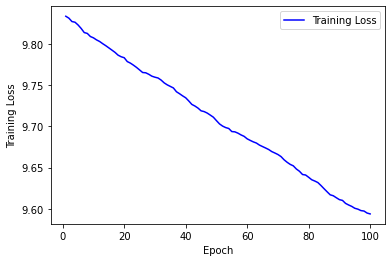

In [ ]:
# Training Loss
plt.plot(list(range(1,num_epochs+1)), loss, c='b', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

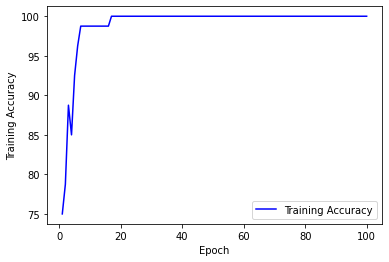

In [ ]:
# Training Accuracy
plt.plot(list(range(1,num_epochs+1)), acc, c='b', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

In [ ]:
Y.detach().squeeze().numpy()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[]

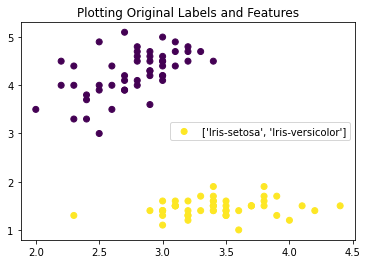

In [ ]:
plt.scatter(X[:,0].detach().numpy(),X[:,1].detach().numpy(),c=Y.detach().squeeze().numpy().tolist(),label=list(label_names.values()))
plt.title('Plotting Original Labels and Features')
plt.legend()
plt.plot()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

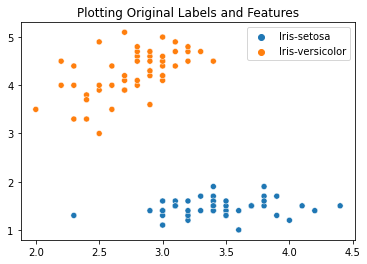

In [ ]:
sns.scatterplot(X[:,0].detach().numpy(),X[:,1].detach().numpy(),hue=[label_names[i] for i in Y.detach().squeeze().numpy().tolist()])
plt.title('Plotting Original Labels and Features')
plt.plot()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

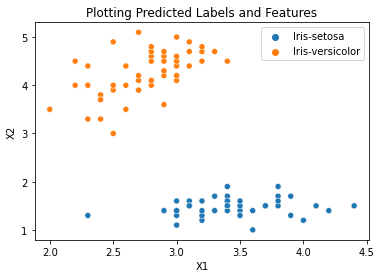

In [ ]:
ones = torch.ones((X.shape[0],1),dtype=torch.float64)
X_all = torch.cat((X,ones),-1)
Y_all = logreg(X_all,W)
# plt.scatter(X[:,0].detach().numpy(),X[:,1].detach().numpy(),c=[Y_all.detach().numpy()>0.5])
# plt.title('Plotting Predicted Labels and Features')
# plt.legend()
# plt.plot()
sns.scatterplot(X[:,0].detach().numpy(),X[:,1].detach().numpy(),hue=[label_names[i] for i in (Y_all.detach().squeeze().numpy()>0.5).tolist()])
plt.title('Plotting Predicted Labels and Features')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot()